In [25]:
import pandas as pd

# Chao1 index
# Chao = Number of Observed Species + (F1^2)/(2*F2)
# Tend to underestimate abundance

def chao1_index(barcode_file):
    num_observed = 0
    for location in range(len(barcode_file)):
        rank = barcode_file['rank_code'].iloc[location]
        reads = barcode_file['direct_reads'].iloc[location]
        if rank in ['S', 'S1'] and reads != 0:
            num_observed += 1
    f1 = 0
    f2 = 0
    for location in range(len(barcode_file)):
        rank = barcode_file['rank_code'].iloc[location]
        reads = barcode_file['direct_reads'].iloc[location]
        
        if rank in ['S', 'S1']:
            if reads == 1:
                f1 += 1
            if reads == 2:
                f2 += 1
    
    return num_observed + ((f1**2)/(2*f2))

In [26]:
# Chao1 index calculation
barcode13 = pd.read_csv("barcode13.kraken.microb.report.txt", sep='\t', usecols=[0, 1, 2, 3, 4], engine='python', names=['percentage', 'clade_reads', 'direct_reads', 'rank_code', 'id'])
barcode14 = pd.read_csv("barcode14.kraken.microb.report.txt", sep='\t', usecols=[0, 1, 2, 3, 4], engine='python', names=['percentage', 'clade_reads', 'direct_reads', 'rank_code', 'id'])
barcode15 = pd.read_csv("barcode15.kraken.microb.report.txt", sep='\t', usecols=[0, 1, 2, 3, 4], engine='python', names=['percentage', 'clade_reads', 'direct_reads', 'rank_code', 'id'])
barcode16 = pd.read_csv("barcode16.kraken.microb.report.txt", sep='\t', usecols=[0, 1, 2, 3, 4], engine='python', names=['percentage', 'clade_reads', 'direct_reads', 'rank_code', 'id'])

chao1_index_13 = chao1_index(barcode13)
chao1_index_14 = chao1_index(barcode14)
chao1_index_15 = chao1_index(barcode15)
chao1_index_16 = chao1_index(barcode16)

print(f"chao1_index_13: {chao1_index_13}")
print(f"chao1_index_14: {chao1_index_14}")
print(f"chao1_index_15: {chao1_index_15}")
print(f"chao1_index_16: {chao1_index_16}")

chao1_index_13: 10756.542345276874
chao1_index_14: 5368.347328244275
chao1_index_15: 2942.125
chao1_index_16: 2630.7074688796683


In [33]:
# Shannon index
# H'= - sum (pi * ln(pi)), where pi is the percentage of individuals belonging to species i
import math
def shannon_index(barcode_file):
    shannon_index = 0
    total_reads = 0
    for location in range(len(barcode_file)):
        rank = barcode_file['rank_code'].iloc[location]
        reads = barcode_file['direct_reads'].iloc[location]
        if rank in ['S', 'S1']:
            total_reads += reads
    for location in range(len(barcode_file)):
        rank = barcode_file['rank_code'].iloc[location]
        reads = barcode_file['direct_reads'].iloc[location]
        percentage_reads = reads/total_reads
        if rank in ['S', 'S1'] and percentage_reads != 0:
            shannon_index += percentage_reads * math.log(percentage_reads)
    return -1 * shannon_index

In [28]:
# Shannon index calculation
shannon_index_13 = shannon_index(barcode13)
shannon_index_14 = shannon_index(barcode14)
shannon_index_15 = shannon_index(barcode15)
shannon_index_16 = shannon_index(barcode16)

print(f"shannon_index_13: {shannon_index_13}")
print(f"shannon_index_14: {shannon_index_14}")
print(f"shannon_index_15: {shannon_index_15}")
print(f"shannon_index_16: {shannon_index_16}")

shannon_index_13: 6.897873691474954
shannon_index_14: 5.251622480110727
shannon_index_15: 5.161706992569012
shannon_index_16: 5.248848523360391


In [34]:
# Simpson index
# D = sum (pi^2), where pi is the percentage of individuals belonging to species i
def simpson_index(barcode_file):
    simpson_index = 0
    total_reads = 0
    for location in range(len(barcode_file)):
        rank = barcode_file['rank_code'].iloc[location]
        reads = barcode_file['direct_reads'].iloc[location]
        if rank in ['S', 'S1']:
            total_reads += reads
    for location in range(len(barcode_file)):
        rank = barcode_file['rank_code'].iloc[location]
        reads = barcode_file['direct_reads'].iloc[location]
        if rank in ['S', 'S1'] and reads != 0:
            simpson_index += (reads/total_reads)**2
    return simpson_index

In [32]:
# Simpson index calculation
simpson_index_13 = simpson_index(barcode13)
simpson_index_14 = simpson_index(barcode14)
simpson_index_15 = simpson_index(barcode15)
simpson_index_16 = simpson_index(barcode16)

print(f"simpson_index_13: {simpson_index_13}")
print(f"simpson_index_14: {simpson_index_14}")
print(f"simpson_index_15: {simpson_index_15}")
print(f"simpson_index_16: {simpson_index_16}")

simpson_index_13: 0.006701768663027505
simpson_index_14: 0.022307033740400148
simpson_index_15: 0.016715218202060057
simpson_index_16: 0.017900523416620386


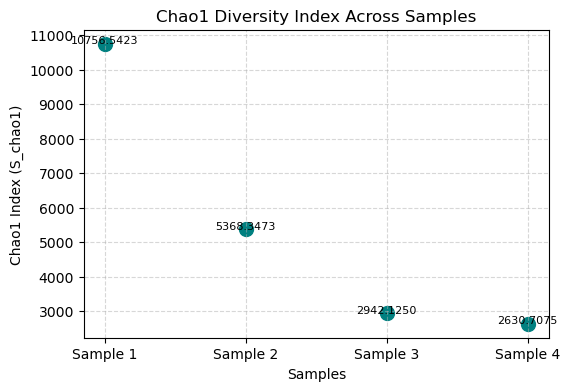

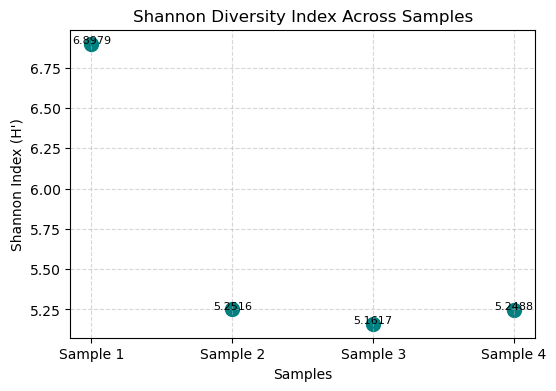

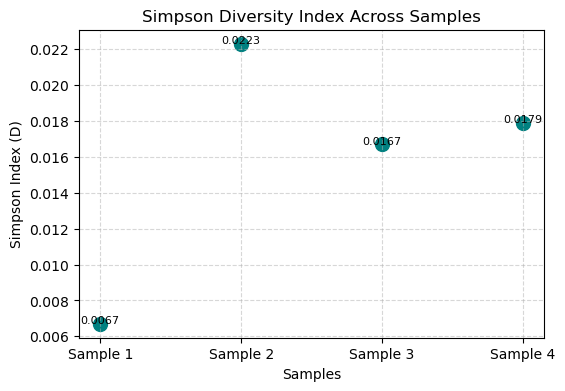

In [41]:
import matplotlib.pyplot as plt

chao1_values = [chao1_index_13, chao1_index_14, chao1_index_15, chao1_index_16]
shannon_values = [shannon_index_13, shannon_index_14, shannon_index_15, shannon_index_16]
simpson_values = [simpson_index_13, simpson_index_14, simpson_index_15, simpson_index_16]
sample_labels = ['Sample 1', 'Sample 2', 'Sample 3', 'Sample 4']

# Chao1 plot
plt.figure(figsize=(6, 4))
plt.scatter(sample_labels, chao1_values, color='teal', s=100)

plt.title('Chao1 Diversity Index Across Samples')
plt.ylabel('Chao1 Index (S_chao1)')
plt.xlabel('Samples')

for i, value in enumerate(chao1_values):
    plt.text(i, value, f'{value:.4f}', ha='center', fontsize=8)
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig("chao1.png", dpi=300, bbox_inches='tight')
plt.show()

# Shannon plot
plt.figure(figsize=(6, 4))
plt.scatter(sample_labels, shannon_values, color='teal', s=100)

plt.title('Shannon Diversity Index Across Samples')
plt.ylabel("Shannon Index (H')")
plt.xlabel('Samples')

for i, value in enumerate(shannon_values):
    plt.text(i, value, f'{value:.4f}', ha='center', fontsize=8)
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig("shannon.png", dpi=300, bbox_inches='tight')
plt.show()

# Simpson plot
plt.figure(figsize=(6, 4))
plt.scatter(sample_labels, simpson_values, color='teal', s=100)

plt.title('Simpson Diversity Index Across Samples')
plt.ylabel('Simpson Index (D)')
plt.xlabel('Samples')

for i, value in enumerate(simpson_values):
    plt.text(i, value, f'{value:.4f}', ha='center', fontsize=8)
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig("simpson.png", dpi=300, bbox_inches='tight')
plt.show()